#Cardiovascular disease

##Connecting to the Dataset

We will use the Kaggle API Token setup to use our dataset directly from the Kaggle website.

**Upload Kaggle API Token to Google Colab:**

In [13]:
#from google.colab import files

# Upload kaggle.json
#files.upload()

**Install Kaggle Package:**

In [14]:
#!pip install -q kaggle

**Move Kaggle API Token:**

In [15]:
#!mkdir -p /root/.kaggle
#!mv kaggle.json /root/.kaggle/

**Download the Dataset:**

In [16]:
#!kaggle datasets download -d jocelyndumlao/cardiovascular-disease-dataset

In [17]:
#!chmod 600 /root/.kaggle/kaggle.json

This might posses a problem since it limits only me to reade/write to the jason file. (644)TODO: We will address this later by implementing Shared Kaggle API key.

**Unzip the Dataset:**

In [18]:
#!unzip -q cardiovascular-disease-dataset.zip


##Introduction / Business Understanding

## Data Understanding

###Collecting initial data

First, some imports:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Initial Data Collect:**

In [20]:
file_path = './content/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv'

cardio_df = pd.read_csv(file_path)

**Data Description:**

Let's take a look at our features as well as the min/max values:

In [21]:
# Upload Dataset_Description.png
#files.upload()

In [22]:
from IPython.display import Image, display

image_path = './content/Dataset_Description.png'

# Display the image
#display(Image(filename=image_path))

In [23]:
cardio_df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [24]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [25]:
cardio_df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Only 1000 instances, hopefully this won't make a problem.

---

###Feature Overview

Feature "patiendid" **WILL** be dropped during modelling since it is not a meaningful value for our model, but it gives us an interesting information:

<Axes: title={'center': 'patientid'}, ylabel='Frequency'>

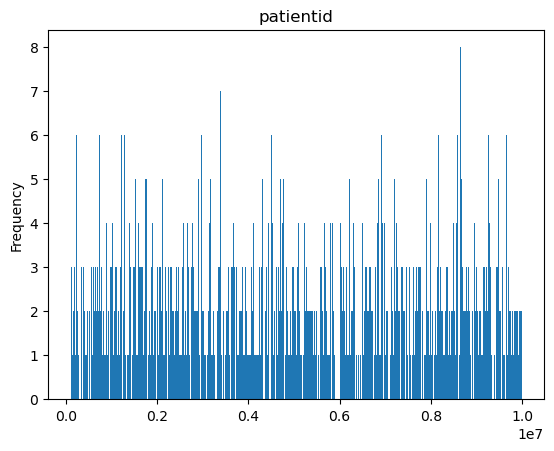

In [26]:
cardio_df['patientid'].plot(kind='hist', bins=500, title='patientid')

As we can se on the plot above, it seems like our dataset is a collection of slices of the original dataset. This is probably to avoid the trends related to the timeframe. This is good, althoud set could be a bit bigger for more complex models.

---

<Axes: title={'center': 'age'}, ylabel='Frequency'>

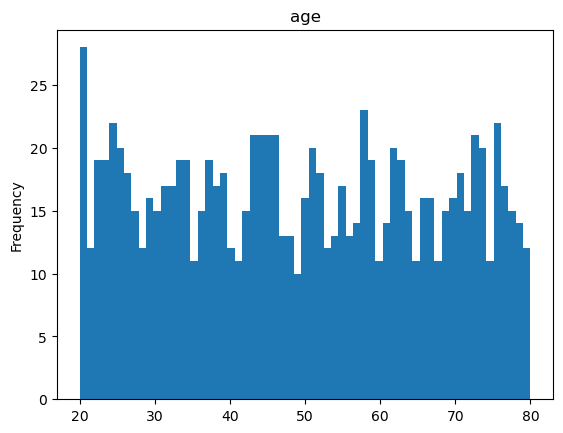

In [27]:
cardio_df['age'].plot(kind='hist', bins=61, title='age')

As we can see in a histogram above, the ages are evenly distributed from 20 to 80 years old, so only grown ups are taken into consideration. Instead of using histogram, we could have seen the 'mean' value above in the table which is 49. That sits  almost perfectly in the middle!

---

But, if we take a look at the 'gender' feature, we see that the set is not regularized in regards to it:

<Axes: title={'center': 'gender'}, ylabel='Frequency'>

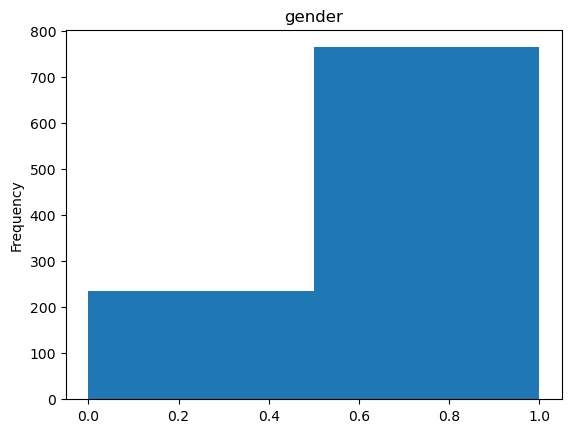

In [28]:
cardio_df['gender'].plot(kind='hist', bins=2, title='gender')

We will see if this will affect our research. In dealing with this we have 2 options:


1.   Make our training sets regularized to it, but then half of the dataset will be unusable.
2.   First take a look if the gender matters at all for our classification. In case it don't we can possibly drop this feature.
---

<Axes: title={'center': 'chestpain'}, ylabel='Frequency'>

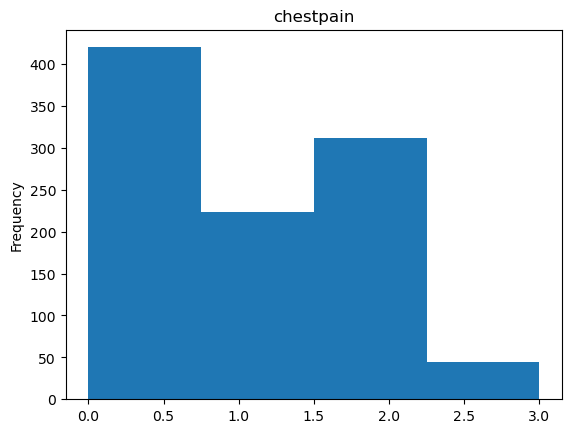

In [29]:
cardio_df['chestpain'].plot(kind='hist', bins=4, title='chestpain')

Chest pain value indicates the severity of it and it is ordinal data. Here is what the values represent:


> tldr; The smaller the number, the higher the possibility of potential cardiac issues.



0.   **Typical Angina:** This refers to chest pain or discomfort that has a characteristic pattern and is highly indicative of heart-related problems. It typically includes symptoms such as pressure or squeezing in the chest, pain that radiates to the arms, neck, jaw, or back, and is often triggered by exertion or stress.
1.   **Atypical Angina**: This category includes chest pain that doesn't fit the typical pattern of angina but still may be related to heart issues. The symptoms may be less specific or have an unusual presentation.
2.   **Non-Anginal Pain**: Chest pain that is not related to the heart. It could be due to issues such as muscle or skeletal problems, respiratory conditions, or gastrointestinal disorders.
3.   **Asymptomatic**: This means the absence of symptoms. In the context of heart-related issues, it would refer to individuals who do not experience chest pain or other typical symptoms.

---


<Axes: title={'center': 'restingBP'}, ylabel='Frequency'>

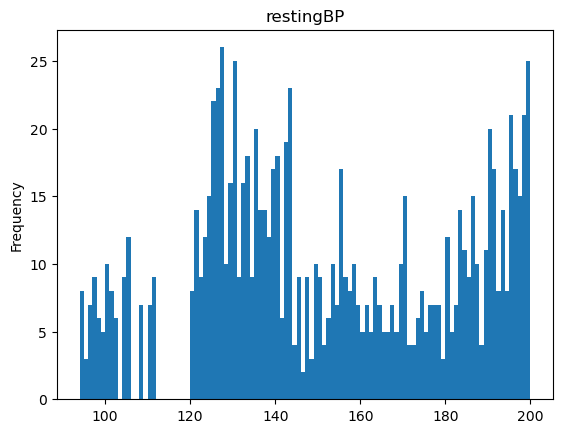

In [30]:
cardio_df['restingBP'].plot(kind='hist', bins=106, title='restingBP')

Resting blood pressure is typically measured in millimeters of mercury (mmHg) and is expressed as two values: systolic and diastolic. These values represent the pressure in the arteries during the cardiac cycle. Here's a general guideline for interpreting resting blood pressure values:


1.   **Systolic Pressure (Top Number):**

*   Represents the pressure in the arteries when the heart contracts (beats).
*   Normal: Less than 80 mmHg
*   Elevated: 80-89 mmHg
*   Hypertension Stage 1: 90-99 mmHg
*   Hypertension Stage 2: 100 mmHg or higher
*   Hypertensive Crisis: 120 mmHg or higher (Seek emergency care)

2.   **Diastolic Pressure (Bottom Number)**
*   Represents the pressure in the arteries when the heart is at rest between beats.
*   Normal: Less than 120 mmHg
*   Elevated: 120-129 mmHg
*   Hypertension Stage 1: 130-139 mmHg
*   Hypertension Stage 2: 140 mmHg or higher
*   Hypertensive Crisis: 180 mmHg or higher (Seek emergency care)

There is also a, rarely used, single value representation **"mean arterial pressure"**
>(MAP) = 1/3 * Systolic pressure  + 2/3 Diastolic pressure.

So which value do we have?
We can ask our histogram!
Looking at the values we have, they are too high to be a Diastolic or MAP pressure (values close to 200mmHg), so we can assume that this is a Systolic Pressure. Although, it is a very concerning fact that there is no values below 94. Further assessment has to be done.

---


<Axes: title={'center': 'serumcholestrol'}, ylabel='Frequency'>

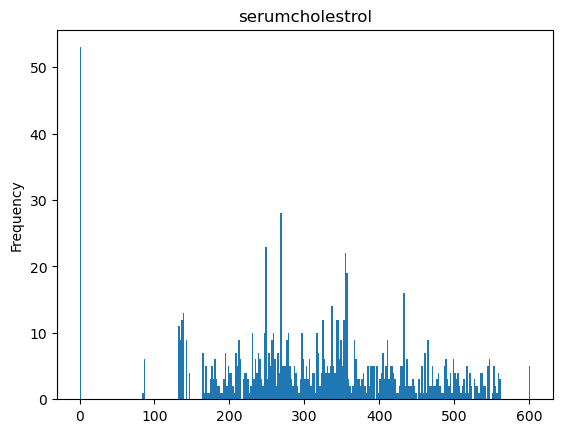

In [31]:
cardio_df['serumcholestrol'].plot(kind='hist', bins=301, title='serumcholestrol')

Serum cholesterol refers to the level of cholesterol in the blood, specifically in the serum component. Cholesterol is a fatty substance that is crucial for building cell membranes, producing hormones, and aiding in the digestion of fats. However, elevated levels of cholesterol in the blood are associated with an increased risk of cardiovascular diseases.

Serum cholesterol is often measured through a blood test, and the results are typically expressed in milligrams per deciliter (mg/dL).

Our single value is probably the **Total Cholesterol** which is the sum of LDL (Low-Density Lipoprotein Cholesterol, "bad"), HDL (High-Density Lipoprotein Cholesterol, "good"), and a fraction of triglycerides (another type of fat in the blood).

Optimal value is less than 200 mg/dL, but it's important to note that optimal levels may vary based on individual health factors.

Based on histogram, high Cholesterol is a modern usual problem.


---

<Axes: title={'center': 'fastingbloodsugar'}, ylabel='Frequency'>

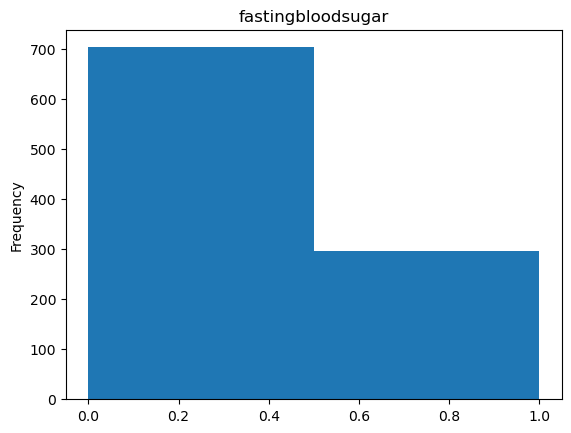

In [32]:
cardio_df['fastingbloodsugar'].plot(kind='hist', bins=2, title='fastingbloodsugar')

Fasting blood sugar, also known as fasting glucose, is a measurement of the amount of glucose (sugar) in your blood after a period of fasting. This test is commonly used to assess and monitor blood sugar levels, especially in the diagnosis and management of diabetes.

The test is usually performed after an overnight fast, and the results provide information about how effectively your body is regulating glucose. Elevated fasting blood sugar levels may indicate impaired glucose metabolism, insulin resistance, or diabetes.

Here, we have a categorical values 0 and 1, where 1 stands for the fasting sugar value greater than 120 mg/dL which basically means a person could be diagnosed with diabetes.

---

<Axes: title={'center': 'restingrelectro'}, ylabel='Frequency'>

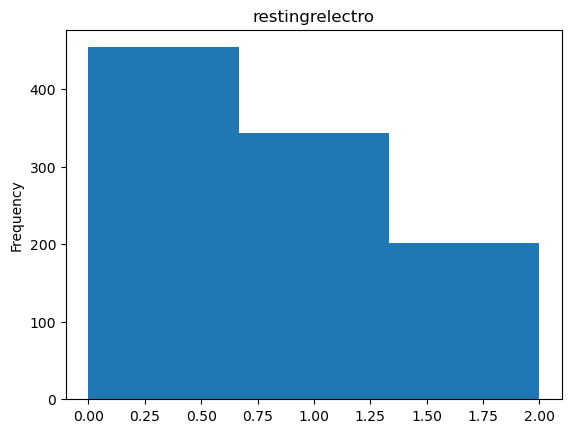

In [33]:
cardio_df['restingrelectro'].plot(kind='hist', bins=3, title='restingrelectro')

Resting electrocardiogram, also known as ECG is a diagnostic test that records the electrical activity of the heart over a specific period, and it provides valuable information about the heart's rhythm and structure.

Some of key components are: Heart Rate, Rhytm, P Wave, QRS Complex, ST Segment, T Wave, QT Interval...

Here we have the outcome classified in 3 classes, which can be interpreted as following:

0.   **Normal ECG**

*   No significant abnormalities observed.
*   All ECG parameters, including P waves, QRS complexes, ST segments, and T waves, fall within normal ranges.
*   Heart rate is within the normal range (60 to 100 bpm).

1.   **ST-T Wave Abnormality**

*   Presence of abnormalities in the ST-T wave complex.
*   This may include T-wave inversions, ST elevation, or depression of > 0.05 mV.
*   These changes may indicate myocardial ischemia or injury.

2.   **Probable or Definite Left Ventricular Hypertrophy (LVH) by Estes' Criteria**


*   Signs on the ECG suggesting an increased mass of the left ventricle.
*   LVH is often associated with conditions like hypertension or other cardiac diseases.
*   Estes' criteria involve specific ECG criteria for identifying LVH.




---

<Axes: title={'center': 'maxheartrate'}, ylabel='Frequency'>

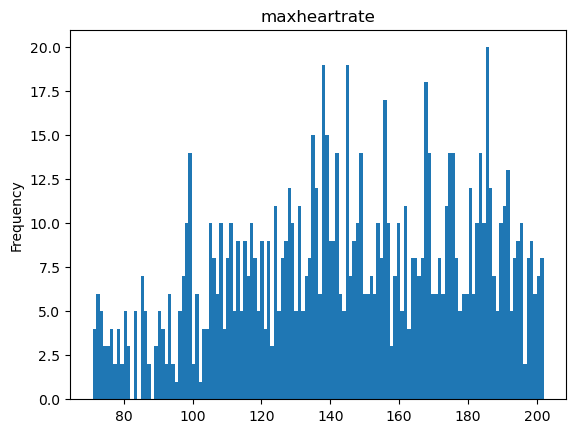

In [34]:
cardio_df['maxheartrate'].plot(kind='hist', bins=132, title='maxheartrate')

Well, this is a bit tricky value. In base, the maximum heart rate achieved is the highest heart rate reached during a period of physical exertion or stress. It is a crucial parameter used in various contexts, especially in exercise physiology, sports training, and cardiovascular health assessment.

The problem is, we don't know during which activity this maximum value vas achieved. During the intensive testing or during the calm state. The values seem high enough to represent the real test values, but what are the odds that the patients got tested vigorously in order to achueve such data? Or did they wear measuring device for some time in order to get day-to-day data?

We don't know, therefore we can thing of dropping this feature.

---


**Exercise-induced angina**, also known as angina pectoris, is chest pain or discomfort that occurs during physical activity or exertion. It is a common symptom of coronary artery disease (CAD) and is caused by reduced blood flow to the heart muscle.

1 means it is diagnosed

0 means the opposite

---

<Axes: title={'center': 'oldpeak'}, ylabel='Frequency'>

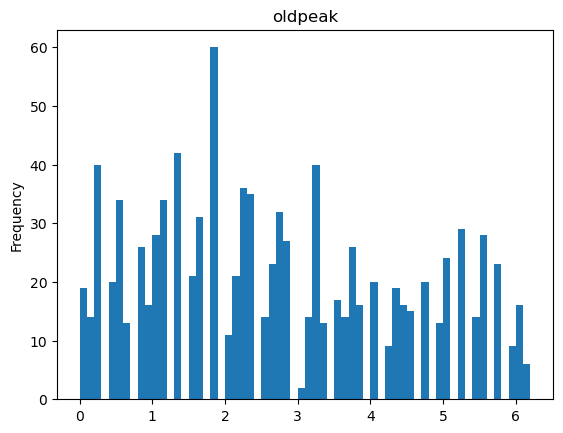

In [35]:
cardio_df['oldpeak'].plot(kind='hist', bins=62, title='oldpeak')

In the context of an exercise stress test, Oldpeak refers to the depression of the ST segment during the recovery phase after exercise. ST depression can be an indicator of myocardial ischemia (inadequate blood flow to the heart muscle) during periods of increased stress or exertion.

The ST segment is a portion of the ECG waveform that represents the interval between ventricular depolarization and repolarization.

The magnitude of ST depression, often measured in millimeters, is referred to as Oldpeak, and it is an important parameter in the interpretation of stress test results. Higher Oldpeak values may suggest a more significant degree of ischemia.

---

<Axes: title={'center': 'slope'}, ylabel='Frequency'>

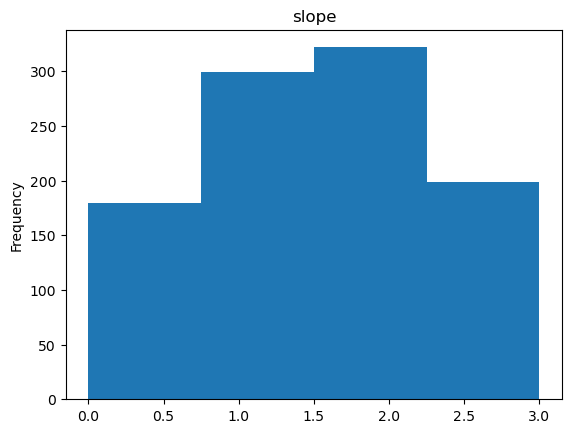

In [36]:
cardio_df['slope'].plot(kind='hist', bins=4, title='slope')

Here we see that we have 4 classes, although we are supposed to have only 3? This is to be addressed. We need to see why do we have a 0 value, since the documentation says it's supposed to be only 1, 2 or 3. It could be that the missing value was assigned 0 value.

The slope of the peak exercise ST segment, in the context of an exercise stress test or electrocardiogram (ECG or EKG), is a parameter used to evaluate the changes in the ST segment during the exercise phase. The ST segment is a portion of the ECG waveform that represents the interval between ventricular depolarization and repolarization.

Slope Types:


1.   **Upsloping (Positive):** The ST segment rises gradually during exercise.
2.   **Horizontal (Flat):** The ST segment maintains a constant level during exercise.
3.   **Downsloping (Negative):** The ST segment descends during exercise.



Upsloping or horizontal ST segments are generally considered less indicative of myocardial ischemia than downsloping segments!

---



<Axes: title={'center': 'noofmajorvessels'}, ylabel='Frequency'>

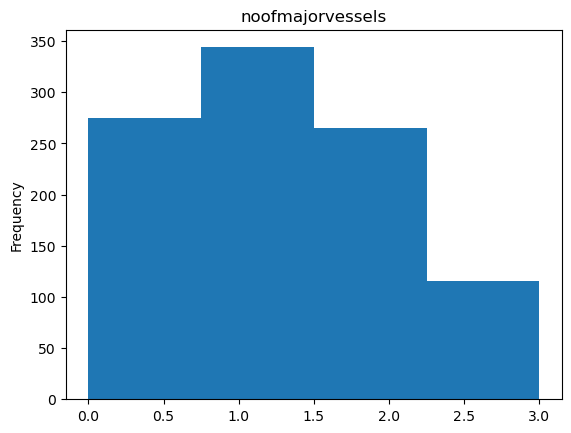

In [37]:
cardio_df['noofmajorvessels'].plot(kind='hist', bins=4, title='noofmajorvessels')

The "number of major vessels" in the context of cardiovascular health often refers to the number of major coronary arteries that show significant narrowing or blockages. This information is typically obtained through diagnostic procedures such as coronary angiography.

The main coronary arteries are:
*   the left main coronary artery (LMCA)
*   left anterior descending artery (LAD)
*   left circumflex artery (LCx)
*   right coronary artery (RCA)

For example, if someone has a "2-vessel disease," it means that two major coronary arteries have significant blockages.

The involvement of multiple major vessels with significant stenosis (narrowing) is an important indicator of the extent and severity of coronary artery disease (CAD).

---

<Axes: title={'center': 'target'}, ylabel='Frequency'>

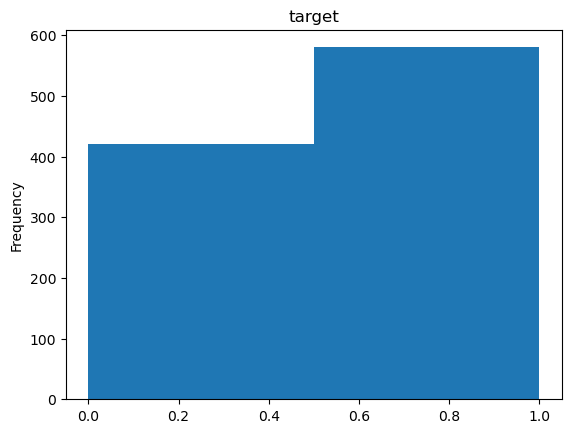

In [38]:
cardio_df['target'].plot(kind='hist', bins=2, title='target')

And finally, our target value:

*   1 → Presence of Heart Disease
*   0 → Absence of Heart Disease

We will build a model which will, based on the other features, guess whether a pacient has or has not a heart Disease.

It is also very important to realize that there is a difference in count of ground truth positive and ground truth negative instances. That means that we have to **regularize** our training split, so that the model don't 'per se' assume that one outcome is more likely than the other.

### Data Correlation

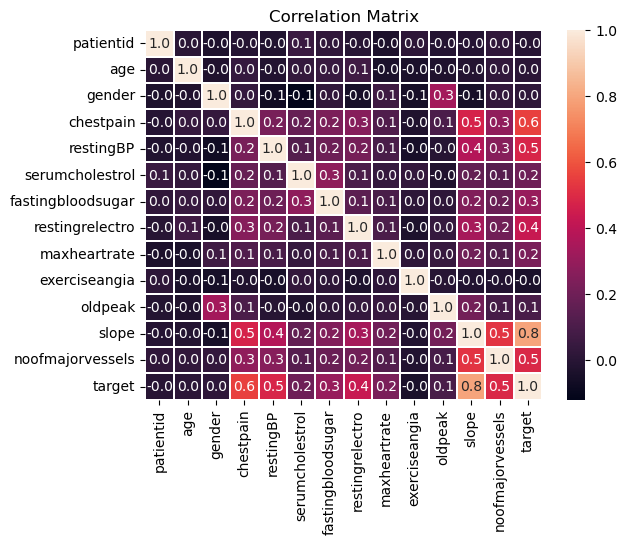

In [39]:
import seaborn as sns

correlation_matrix = cardio_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.2)
plt.title('Correlation Matrix')
plt.show()

The above given correlation matrix tells us that there is a strong colleration between some of our features. Namely between:

*   Chestpain & Slope
*   Slope & No of blocked major vessels
*   Chestpain & target (read whether a person has a Cardiac Disease)
*   RestingBP & Target
*   Slope & Target
*   No of blocked major vessels & Target

Interestingly, there are some attributes with a very high correlation, e.g. (Chestpain|Slope) perimeter and -area. It might be worth trying to remove them in a preprocessing step (we will not do that for now).

The later 4 are direct correlations between a feature and a target value, which could possibly mean (not implicitly!) they are more impactful features on our outcome.



### Initial Findings

lorem ipsum

## Data Preparation

This dataset seems preprocesed, but lets confirm that.

In [40]:
# Check for missing values
print(cardio_df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


We have no missing values. (Except potential 0 slope value, additional documentation needed to conclude.)

In [41]:
# Check for duplicates
print(cardio_df.duplicated().sum())

0


No duplicates.

In [42]:
# Check data types
print(cardio_df.dtypes)

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object


Seems like the datatypes need no change.

In [43]:
for column in cardio_df.columns:
  # Check unique values
  unique_values = cardio_df[column].unique()
  # Print or analyze unique values for each column
  print(f"Number of unique values for {column}:", len(unique_values))
  print("\n")

Number of unique values for patientid: 1000


Number of unique values for age: 61


Number of unique values for gender: 2


Number of unique values for chestpain: 4


Number of unique values for restingBP: 95


Number of unique values for serumcholestrol: 344


Number of unique values for fastingbloodsugar: 2


Number of unique values for restingrelectro: 3


Number of unique values for maxheartrate: 129


Number of unique values for exerciseangia: 2


Number of unique values for oldpeak: 63


Number of unique values for slope: 4


Number of unique values for noofmajorvessels: 4


Number of unique values for target: 2




Again, only the slope values seem odd.

## Modelling

### Train-test split

In [44]:
from sklearn.model_selection import train_test_split


y = cardio_df['target']
X = cardio_df.iloc[:,0:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

Selected models

#### Decision Trees

#### K-NN

## Evaluation

##Conclusion